In [1]:
import tarfile
import os
import shutil

import glob
import numpy as np 

- file download

In [2]:
!wget http://vision.stanford.edu/aditya86/ImageNetDogs/images.tar

--2021-02-10 23:20:40--  http://vision.stanford.edu/aditya86/ImageNetDogs/images.tar
Resolving vision.stanford.edu (vision.stanford.edu)... 171.64.68.10
Connecting to vision.stanford.edu (vision.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 793579520 (757M) [application/x-tar]
Saving to: 'images.tar'

     0K .......... .......... .......... .......... ..........  0%  177K 73m1s
    50K .......... .......... .......... .......... ..........  0%  347K 55m8s
   100K .......... .......... .......... .......... ..........  0%  353K 48m57s
   150K .......... .......... .......... .......... ..........  0%  359K 45m43s
   200K .......... .......... .......... .......... ..........  0% 11.3M 36m47s
   250K .......... .......... .......... .......... ..........  0%  366K 36m32s
   300K .......... .......... .......... .......... ..........  0% 11.1M 31m28s
   350K .......... .......... .......... .......... ..........  0% 11.3M 27m40s
   40

In [7]:
TARGET_PATH = "Images"
# if os.path.exists(TARGET_PATH):
#     shutil.rmtree(TARGET_PATH)

- zip extract

In [8]:
fname = 'images.tar'
tar = tarfile.open(fname, "r:tar")
tar.extractall()
tar.close()

In [9]:
len(os.listdir(TARGET_PATH))

240

- 이름 편하게 변경

In [10]:
for dir_name in os.listdir(TARGET_PATH):
    dst = os.path.join(TARGET_PATH,dir_name)
    dir_ = dir_name.split('-')[1].lower()
    target = os.path.join(TARGET_PATH,dir_)
    os.rename(dst, target)

IndexError: list index out of range

- Dataset 만들기(array) - data, label 나누기

In [11]:
dataset = []
for filepath in glob.iglob(f'{TARGET_PATH}/**/*.jpg',recursive=True):
    breed_name = filepath.split('\\')[1]
    dataset.append([filepath, breed_name])
dataset = np.array(dataset)


In [12]:
next(glob.iglob(f'{TARGET_PATH}/**/*.jpg',recursive=True))

'Images\\affenpinscher\\n02110627_10147.jpg'

- Dataset 가공(train, test)

In [13]:
from sklearn.model_selection import train_test_split
train_image, test_image, train_label, test_label= train_test_split(dataset[:,0],dataset[:,1],train_size=0.8,test_size=0.2, stratify=dataset[:,1])

In [ ]:
len(train_image)

In [ ]:
hello = x_train[:]

- Kfold

In [14]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)
kf.get_n_splits(hello)
list(kf.split(hello))

NameError: name 'hello' is not defined

- check

In [15]:
import pandas as pd
(pd.Series(test_label).value_counts() / len(test_label)).head(10)

n02085936-Maltese_dog           0.006195
maltese_dog                     0.006074
afghan_hound                    0.005831
n02088094-Afghan_hound          0.005831
n02092002-Scottish_deerhound    0.005709
scottish_deerhound              0.005588
n02111889-Samoyed               0.005345
irish_wolfhound                 0.005345
n02112018-Pomeranian            0.005345
samoyed                         0.005345
dtype: float64

In [ ]:
(pd.Series(train_label).value_counts() / len(train_label)).head(10)

- dataset train, test 폴더생성

In [16]:
DATA_PATH = 'dataset'
if not os.path.exists(DATA_PATH):
    os.mkdir(DATA_PATH)
    os.makedirs(os.path.join(DATA_PATH, 'train'))
    os.makedirs(os.path.join(DATA_PATH, 'test'))
    
    for breed_name in set(test_label):
        os.makedirs(os.path.join(DATA_PATH, 'train', breed_name))
        os.makedirs(os.path.join(DATA_PATH, 'test', breed_name))

In [ ]:
import shutil
for filepath, label_dir in zip(train_image.tolist(), train_label.tolist()):
    filename = filepath.split("\\")[-1]
    source_path = filepath
    target_dir = os.path.join(DATA_PATH,'train',label_dir,filename)
    shutil.copy(source_path, target_dir)

In [ ]:
for filepath, label_dir in zip(test_image.tolist(), test_label.tolist()):
    filename = filepath.split("\\")[-1]
    source_path = filepath
    target_dir = os.path.join(DATA_PATH,'test',label_dir,filename)
    shutil.copy(source_path, target_dir)

- 이미지 출력

In [ ]:
from PIL import Image

In [ ]:
im = Image.open(target_dir)
im

In [22]:
def imshow(image, ax=None, title=None, normalize=True):
    """Imshow for Tensor."""
    if ax is None:
        fig, ax = plt.subplots()
    image = image.numpy().transpose((1, 2, 0))

    if normalize:
        mean = np.array([0.485, 0.456, 0.406])
        std = np.array([0.229, 0.224, 0.225])
        image = std * image + mean
        image = np.clip(image, 0, 1)

    ax.imshow(image)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(axis='both', length=0)
    ax.set_xticklabels('')
    ax.set_yticklabels('')

    return ax

['n02112706-Brabancon_griffon' 'cocker_spaniel' 'n02091635-otterhound'
 'n02095889-Sealyham_terrier' 'sussex_spaniel' 'n02113799-standard_poodle'
 'flat' 'n02105412-kelpie' 'n02115641-dingo' 'yorkshire_terrier']


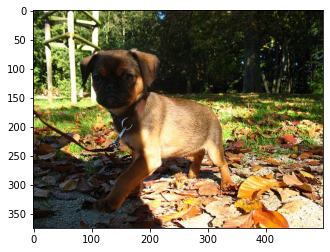

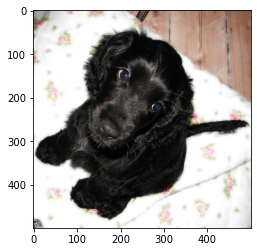

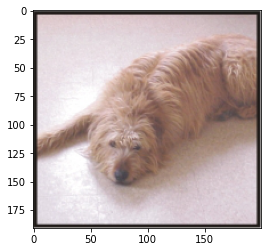

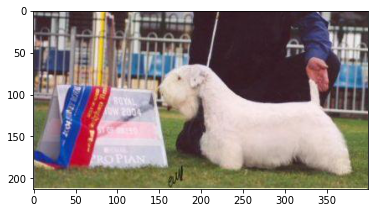

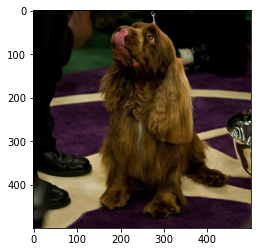

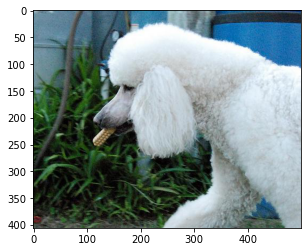

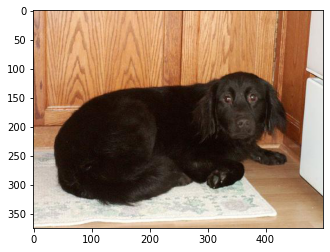

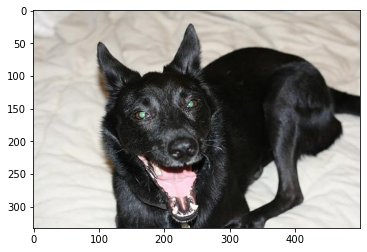

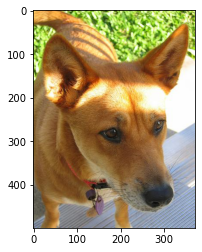

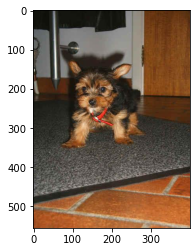

In [20]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def process(filename: str=None) -> None:
    image = mpimg.imread(filename)
    plt.figure()
    plt.imshow(image)

idx = np.random.choice(len(dataset),10)

images = dataset[:,0][idx]

for file in images:
    process(file)
    
print(dataset[:,1][idx])

In [17]:
from torchvision import datasets, transforms, models

# TODO: Define transforms for the training data and testing data
train_transforms = transforms.Compose([transforms.RandomRotation(30),
                                       transforms.RandomResizedCrop(224),
                                       transforms.RandomHorizontalFlip(),
                                       transforms.ToTensor(),
                                       transforms.Normalize([0.485, 0.456, 0.406],
                                                            [0.229, 0.224, 0.225])])

test_transforms = transforms.Compose([transforms.Resize(255),
                                      transforms.CenterCrop(224),
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.485, 0.456, 0.406],
                                                           [0.229, 0.224, 0.225])])

DATASET_PATH = "dataset"
# Pass transforms in here, then run the next cell to see how the transforms look
train_data = datasets.ImageFolder(DATASET_PATH + '/train', transform=train_transforms)
test_data = datasets.ImageFolder(DATASET_PATH + '/test', transform=test_transforms)

In [18]:
import torch
train_loader = torch.utils.data.DataLoader(train_data, batch_size=32, shuffle=True)
test_loader = torch.utils.data.DataLoader(train_data, batch_size=32, shuffle=True)


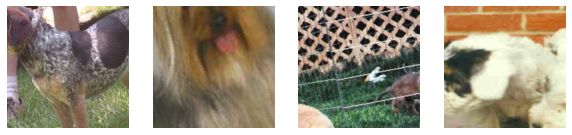

In [23]:
data_iter = iter(test_loader)

images, labels = next(data_iter)
fig, axes = plt.subplots(figsize=(10,4), ncols=4)
for ii in range(4):
    ax = axes[ii]
    imshow(images[ii], ax=ax, normalize=True)